In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv("D:/Dixant/CDAC/Machine Learning/03-01-22/TimeSeries.csv",parse_dates=['Date'],index_col='Date')

In [3]:
data.head()

,Value
Date,
1991-01-07,3.526591
1991-01-08,3.180891
1991-01-09,3.252221
1991-01-10,3.611003
1991-01-11,3.565869


In [4]:
data.tail()

,Value
Date,
2008-01-02,21.654285
2008-01-03,18.264945
2008-01-04,23.107677
2008-01-05,22.912510
2008-01-06,19.431740


In [5]:
data.shape

(204, 1)

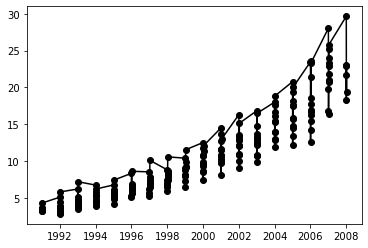

In [6]:
plt.plot(data,marker="o",color="black",label="Orignal Data")
plt.show()

In [7]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(data['Value'])
test_result

(3.1451856893067336,
 1.0,
 15,
 188,
 {'1%': -3.465620397124192,
  '5%': -2.8770397560752436,
  '10%': -2.5750324547306476},
 549.6705685364172)

In [8]:
data['seasonal_difference']=data['Value']-data['Value'].shift(8)
test_result=adfuller(data['seasonal_difference'].dropna())
test_result

(-4.495051811502687,
 0.0002007280479195729,
 15,
 180,
 {'1%': -3.4672111510631, '5%': -2.877734766803841, '10%': -2.575403364197531},
 518.151950372488)

In [9]:
import statsmodels.api as sm

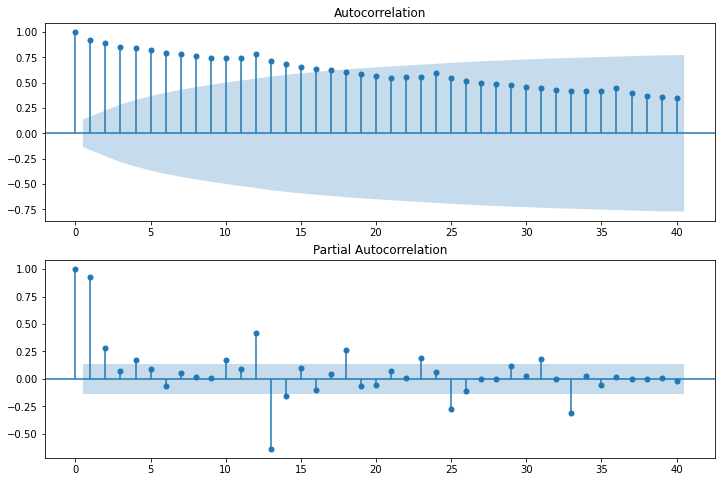

In [10]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['Value'], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['Value'], lags=40, ax=ax2)

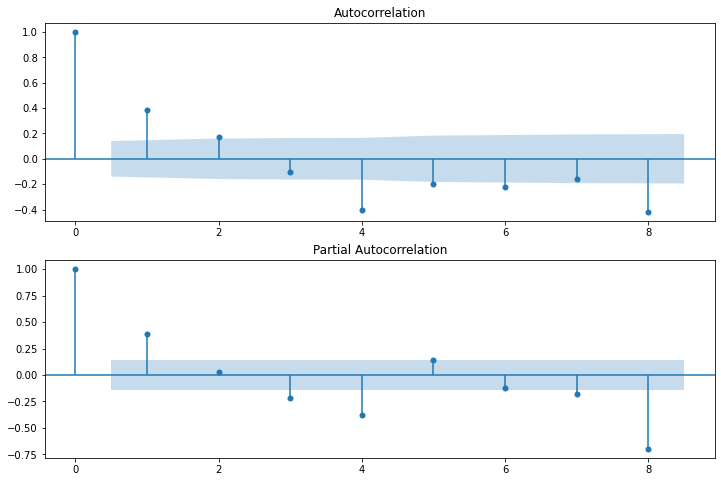

In [11]:
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['seasonal_difference'].dropna(), lags=8, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['seasonal_difference'].dropna(), lags=8, ax=ax2)

In [12]:
from statsmodels.tsa.arima_model import ARMA

In [13]:
ARMAmodel=ARMA(data['Value'],order=(1,1))
ARmodel_fit=ARMAmodel.fit(disp=False)

C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

In [14]:
actuals = data['Value'][200:204]
actuals

Date
2008-01-03    18.264945
2008-01-04    23.107677
2008-01-05    22.912510
2008-01-06    19.431740
Name: Value, dtype: float64

In [15]:
ypredicted=ARmodel_fit.predict(200,203)
print(ypredicted)

Date
2008-01-03    24.439980
2008-01-04    21.945468
2008-01-05    22.341814
2008-01-06    22.503968
dtype: float64


In [16]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(actuals,ypredicted)
print('MAE: %f'%mae)

MAE: 2.745042


In [17]:
import itertools
i = j = range(0, 4)
ij = itertools.product(i,j)
for parameters in ij:
    try:
        mod = ARMA(data['Value'],order=parameters)
        results = mod.fit()
        ypredicted = results.predict(200,203) # end point included
        mae = mean_absolute_error(actuals, ypredicted)
        print('ARMA{} - MAE:{}'.format(parameters, mae))
        #print('ARMA{} - AIC:{}'.format(parameters, results.aic))
    except:
        continue

ARMA(0, 0) - MAE:10.234788417843136
ARMA(0, 1) - MAE:6.273328689980362
ARMA(0, 2) - MAE:5.273515849510125


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

ARMA(0, 3) - MAE:4.777578660774888
ARMA(1, 0) - MAE:2.8253589249924707


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

ARMA(1, 1) - MAE:2.7450418206833405
ARMA(1, 2) - MAE:2.408209525465411


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

ARMA(1, 3) - MAE:2.943893955522447
ARMA(2, 0) - MAE:3.675098723800107


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

ARMA(2, 1) - MAE:2.5190018300192207


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarni

ARMA(2, 2) - MAE:2.651390227394131
ARMA(2, 3) - MAE:2.9444554181561484
ARMA(3, 0) - MAE:3.149745275021706


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

ARMA(3, 1) - MAE:2.72967104977306
ARMA(3, 3) - MAE:2.7929545616189273


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [18]:
ARMAmodel = ARMA(data['Value'], order=(1, 2))
ARmodel_fit = ARMAmodel.fit()
ypredicted = ARmodel_fit.predict(200,203) # end point included
print(ypredicted)
mae = mean_absolute_error(actuals, ypredicted)
print('MAE: %f' % mae)
print(ARmodel_fit.aic)

C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

Date
2008-01-03    22.957271
2008-01-04    21.658077
2008-01-05    23.093978
2008-01-06    22.741184
dtype: float64
MAE: 2.408210
869.2386494701448


In [19]:
ypredicted = ARmodel_fit.predict(len(data), len(data)+2)
print(ypredicted)

204    21.333698
205    21.903083
206    21.886536
dtype: float64


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


# ARIMA

In [20]:
from statsmodels.tsa.arima_model import ARIMA

In [21]:
ARIMAmodel = ARIMA(data['Value'], order=(1, 1, 1)) #notice p,d and q value here
ARIMA_model_fit = ARIMAmodel.fit(disp=False)

ypredicted = ARIMA_model_fit.predict(len(data), len(data)+3, typ='levels')
print(ypredicted)


203    21.584632
204    22.326892
205    22.626181
206    22.786365
dtype: float64


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

In [22]:
mae = mean_absolute_error(actuals, ypredicted)
print('MAE: %f' % mae)
print(ARIMA_model_fit.aic)

MAE: 1.935356
843.8379425029516


In [23]:
import itertools
p= d = q = range(0, 4)
pdq = itertools.product(p,d,q)
for parameters in pdq:
    try:
        ARIMAmodel = ARIMA(DrugSalesData['Value'], order=parameters)
        results = ARIMAmodel.fit()
        ypredicted = results.predict(200,203) # end point included
        mae = mean_absolute_error(actuals, ypredicted)
        print('ARIMA{} - MAE:{}'.format(parameters, mae))
    except:
        continue


In [36]:
ARIMAmodel = ARIMA(data['Value'], order=(1, 0, 2)) #notice p,d and q value here
ARIMA_model_fit = ARIMAmodel.fit()
# make prediction
ypredicted = ARIMA_model_fit.predict(len(data), len(data)+3, typ='levels')
print(ypredicted)

C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

204    21.333698
205    21.903083
206    21.886536
207    21.870018
dtype: float64


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [37]:
mae = mean_absolute_error(actuals, ypredicted)
print('MAE: %f' % mae)
print(ARIMA_model_fit.aic)

MAE: 1.934400
869.2386494701448


In [39]:
Sarima=sm.tsa.statespace.SARIMAX(data['Value'],order=(1, 0, 2),seasonal_order=(1,0,2,8))
Sarima_fit = Sarima.fit()
ypredicted = Sarima_fit.predict(len(data), len(data)+3)  # end point included
mae = mean_absolute_error(actuals, ypredicted)
print('MAE: %f' % mae)

C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:996: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting paramete

MAE: 1.719162


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


# Holt’s Linear Trend Model

In [24]:
from statsmodels.tsa.api import Holt

In [25]:
S_df= data['seasonal_difference']
n_df = pd.DataFrame(S_df.T)
n_df.dropna(inplace=True)

In [26]:
n_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 196 entries, 1992-01-03 to 2008-01-06
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   seasonal_difference  196 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


In [27]:
y_to_train = n_df.iloc[:170] # dataset to train
y_to_test = n_df.iloc[170:] # last X months for test 
predict_date = len(n_df) - len(y_to_train)

In [28]:
predict_date

26

0.6083844170372036
2.2472159791999791e-10


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-29-34a3f5915626>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(y_to_train).fit(smoothing_level=0.6, smoothing_slope=0.2, optimized=False)
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\ts

<function matplotlib.pyplot.show(close=None, block=None)>

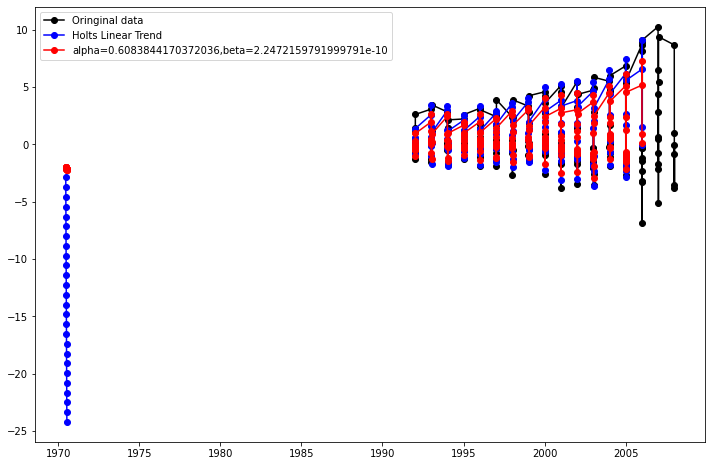

In [29]:
fit1 = Holt(y_to_train).fit(smoothing_level=0.6, smoothing_slope=0.2, optimized=False) 
fcast1 = fit1.forecast(predict_date)
fit2 = Holt(y_to_train).fit()
fcast2 = fit2.forecast(predict_date)
 
alpha = fit2.params["smoothing_level"]
print(alpha)
beta = fit2.params["smoothing_trend"]
print(beta) 
 
plt.figure(figsize=(12, 8))
plt.plot(n_df, marker="o", color="black",label='Oringinal data')
plt.plot(fit1.fittedvalues, marker="o", color="blue")
line1 = plt.plot(fcast1, marker="o", color="blue",label='Holts Linear Trend')
plt.plot(fit2.fittedvalues, marker="o", color="red")
line2 = plt.plot(fcast2, marker="o", color="red",label=f'alpha={alpha},beta={beta}')
plt.legend()
plt.show

In [30]:
y_to_train

,seasonal_difference
Date,
1992-01-03,-0.540780
1992-01-04,0.023889
1992-01-05,-0.124643
1992-01-06,-0.340480
1992-01-07,0.171982
...,...
2005-01-12,5.572052
2006-01-01,8.691592
2006-01-02,-3.168261


In [31]:
a= y_to_test.append(fcast1,ignore_index=True)


In [32]:
y_to_test.head()
fcast1.head()

170   -2.883574
171   -3.736892
172   -4.590211
173   -5.443529
174   -6.296848
dtype: float64

In [33]:
from statsmodels.tsa.api import SimpleExpSmoothing